In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [23]:
sys.path.append('..')

## Calculating Vaccine Coverage for Municipalities

In [24]:
def coverage_age(p,e):
    return (1 +((1-e)*((1/p) -1)))**-1

## Some municipalities with the most cases

In [25]:
first_10 = [35,13]
first_10_names = ['SP','AM']

## Data on population pyramids

In [29]:
data_muns = pd.read_csv('../Data/age_groups_states.csv', delimiter = ';')
data_muns

,Unidade da Federacao,0 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 24 anos,25 a 29 anos,30 a 34 anos,35 a 39 anos,40 a 44 anos,...,50 a 54 anos,55 a 59 anos,60 a 64 anos,65 a 69 anos,70 a 74 anos,75 a 79 anos,80 a 84 anos,85 a 89 anos,90 anos e mais,Total
0,11,140426,137135,135193,146090,157155,157352,155661,151496,137045,...,104469,88302,68240,48643,31555,19369,11015,5130,2820,1815278
1,12,83214,84343,87618,92500,89173,78398,70580,67465,60030,...,39942,30926,24222,18407,12977,8864,5227,2692,1734,906876
2,13,404001,408397,398684,385927,407298,377753,346674,326283,290296,...,192564,153920,118789,86446,57795,37511,22187,11326,6778,4269995
3,14,60910,56319,54588,53040,61022,65306,62404,56626,47152,...,28952,22971,17482,12320,8094,4632,2508,1152,564,652713
4,15,718036,723935,772978,803869,819458,773692,734309,700687,620096,...,428236,342126,274087,208561,143950,96329,56667,28467,16500,8777124
5,16,79738,80978,81327,83230,85763,81083,75552,69183,59277,...,39067,29812,22779,16023,9904,6816,4110,2151,1503,877613
6,17,126415,124661,129692,137035,142687,139038,132300,127297,117887,...,84489,70154,55792,43629,31880,21589,14020,7236,3656,1607363
7,21,586846,579928,635950,670322,664661,607787,583542,559971,488936,...,336599,283425,229756,183817,135913,94677,61813,33405,22672,7153262
8,22,236713,234733,250057,278333,291277,263658,261171,255056,239520,...,181725,160714,132233,105830,80135,54058,34853,17210,9017,3288504
9,23,654978,644554,666495,706774,805193,805194,787711,733590,656883,...,523564,465329,359539,282547,226691,156678,107429,54708,33554,9241366


## Calculating coverage and $S_0$ for each municipality with no age grouping beyond necessary

In [30]:
df_mun = pd.read_csv('../Data/analyzed/age_vaccine_states.csv')

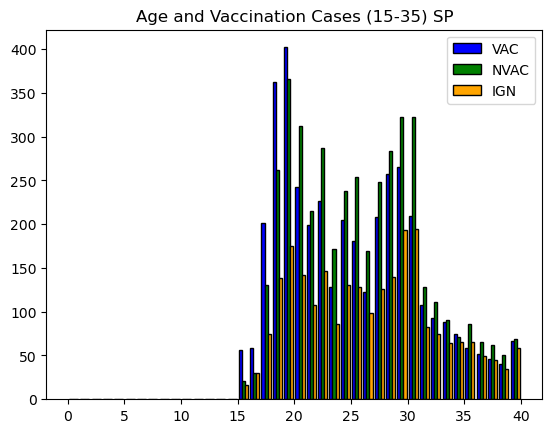

C:\Users\denise.cammarota\AppData\Local\Temp\ipykernel_23100\2742963938.py:26: RuntimeWarning: invalid value encountered in divide
  p_vacs = vacs/(vacs+nvacs)


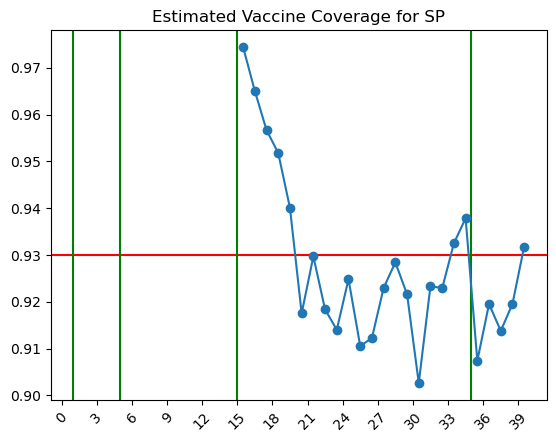

[3429921 3496503 3763557]
721830.2547005964


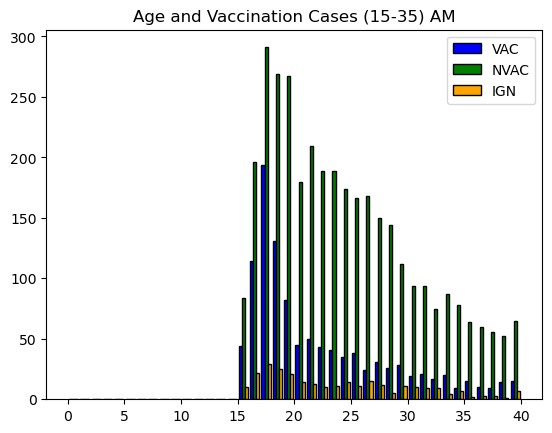

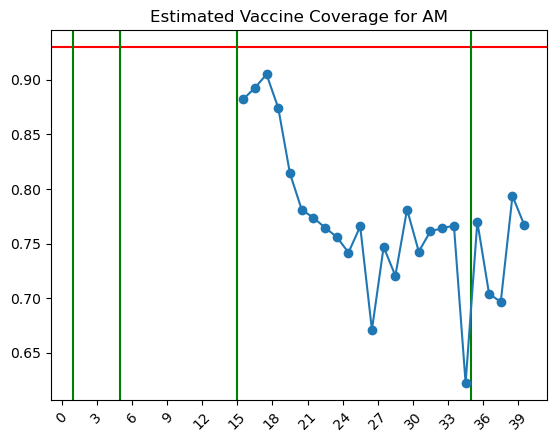

[407298 377753 346674]
236282.89786528348


In [43]:
c = 0
for mun in first_10:
    df_tmp = df_mun[df_mun['SG_UF'] == mun]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] >= 15]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 40]
    mun_name = first_10_names[c]
    min_age = 15
    max_age = 40
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=np.arange(0,max_age+1,1), edgecolor = 'black')
    plt.title('Age and Vaccination Cases (15-35) '+ str(mun_name))
    plt.legend()
    #plt.xlim((15,35))
    #plt.ylim((0,10))
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    #vacs = vacs[1:]
    #nvacs = nvacs[1:]
    #ign = ign[1:]
    p_vacs = vacs/(vacs+nvacs)
    c_vacs = []
    for p in p_vacs:
        if(p == np.nan):
            c_vacs.append(np.nan)
        elif(p == 0):
            c_vacs.append(0)
        else:
            c_vacs.append(coverage_age(p,0.93))
    plt.xticks(np.arange(0,max_age+1,3), rotation = 45)
    plt.axhline(0.93,color = 'r')
    plt.axvline(1, color = 'g')
    plt.axvline(5, color = 'g')
    plt.axvline(15, color = 'g')
    plt.axvline(35, color = 'g')
    plt.title('Estimated Vaccine Coverage for '+ str(mun_name))
    plt.plot(bins[1][0:-1] + 0.5,c_vacs,'-o')
    plt.show()
    c = c + 1
    data_sp = data_muns[data_muns['Unidade da Federacao'] == mun]
    data_sp = data_sp.to_numpy()[0]
    data_sp = data_sp[5:8]
    vec_coverage = np.array([1-np.mean(c_vacs[15:20]),1-np.mean(c_vacs[20:30]), 1-np.mean(c_vacs[30:40])])
    vec_population = data_sp
    vec_nvac_population = vec_coverage*vec_population
    print(data_sp)
    total_nvac = np.sum(vec_coverage*vec_population)
    print(total_nvac)

## Calculating coverage and $S_0$ for each municipality with age grouping

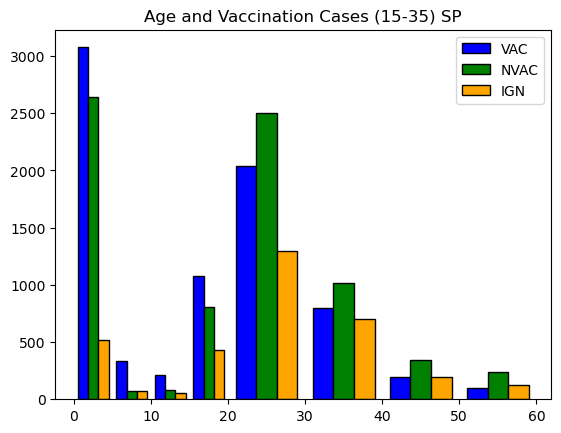

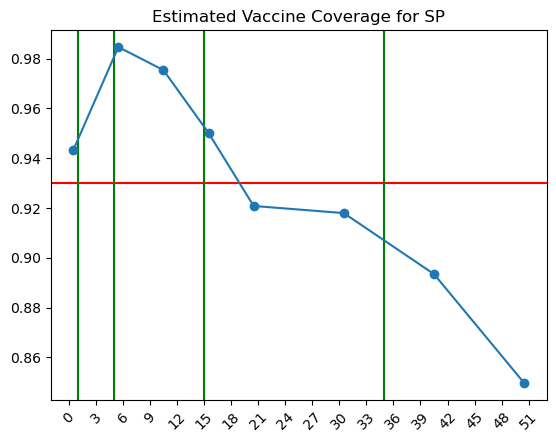

[3058542 2953362 3070987 3429921 3496503 3763557 3869470 3617789]
[0.05677729 0.01538462 0.02465457 0.04986659 0.07918552 0.08205169
 0.10654155 0.15026834]
2007421.4969329853


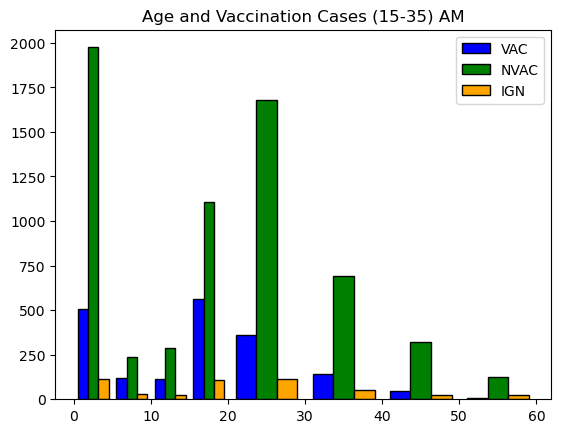

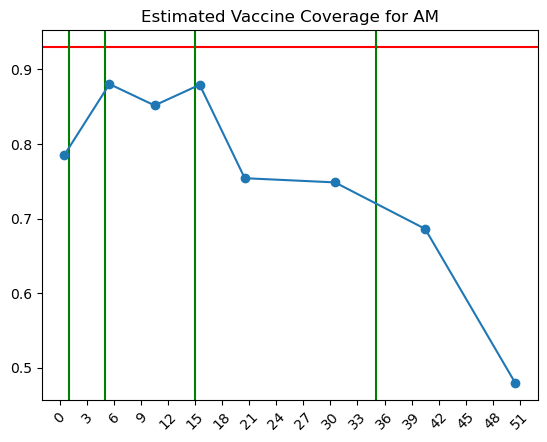

[408397 398684 385927 407298 377753 346674 326283 290296]
[0.21459061 0.11967988 0.14827433 0.12060888 0.24582698 0.25144253
 0.31372549 0.52038369]
675158.505038529


In [46]:
c = 0
for mun in first_10:
    df_tmp = df_mun[df_mun['SG_UF'] == mun]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] >= 0]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 60]
    mun_name = first_10_names[c]
    min_age = 0
    max_age = 60
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins_grouped = np.array([0,5,10,15,20,30,40,50,60])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=bins_grouped, edgecolor = 'black')
    plt.title('Age and Vaccination Cases (15-35) '+ str(mun_name))
    plt.legend()
    #plt.xlim((15,35))
    #plt.ylim((0,10))
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    #vacs = vacs[1:]
    #nvacs = nvacs[1:]
    #ign = ign[1:]
    #vacs = vacs + ign
    p_vacs = vacs/(vacs+nvacs)
    c_vacs = []
    for p in p_vacs:
        if(p == np.nan):
            c_vacs.append(np.nan)
        elif(p == 0):
            c_vacs.append(0)
        else:
            c_vacs.append(coverage_age(p,0.93))
    plt.xticks(np.arange(0,max_age+1,3), rotation = 45)
    plt.axhline(0.93,color = 'r')
    plt.axvline(1, color = 'g')
    plt.axvline(5, color = 'g')
    plt.axvline(15, color = 'g')
    plt.axvline(35, color = 'g')
    plt.title('Estimated Vaccine Coverage for '+ str(mun_name))
    plt.plot(bins[1][0:-1] + 0.5,c_vacs,'-o')
    plt.show()
    c = c + 1
    data_sp = data_muns[data_muns['Unidade da Federacao'] == mun]
    data_sp = data_sp.to_numpy()[0]
    data_sp = data_sp[2:10]
    vec_coverage = 1 - np.array(c_vacs)
    vec_population = data_sp
    vec_nvac_population = vec_coverage*vec_population
    print(data_sp)
    print(vec_coverage)
    total_nvac = np.sum(vec_coverage*vec_population)
    print(total_nvac)

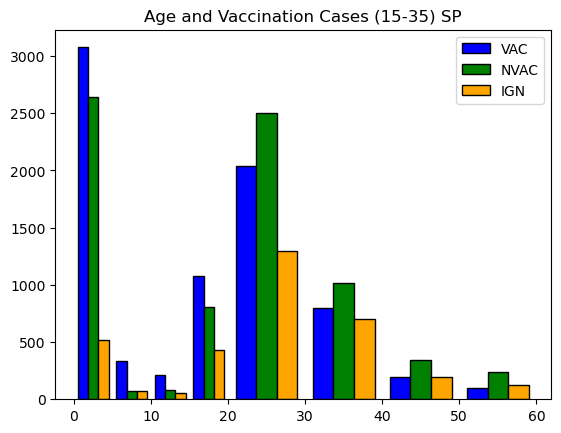

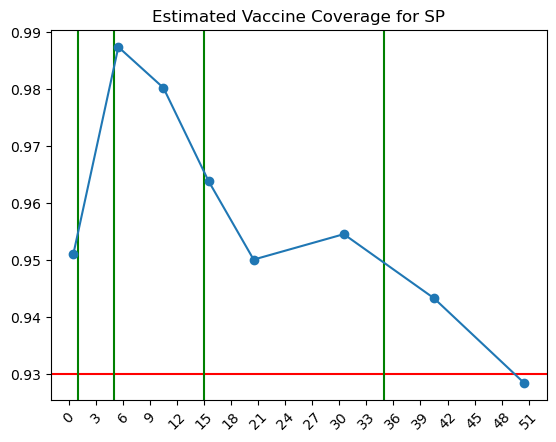

[3058542 2953362 3070987 3429921 3496503 3763557 3869470 3617789]
[0.04898419 0.01258238 0.01974969 0.03610157 0.04988597 0.04542357
 0.05667136 0.07155026]
1194979.6461488428


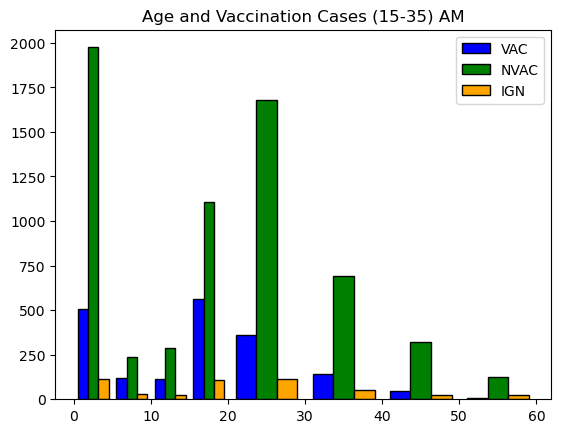

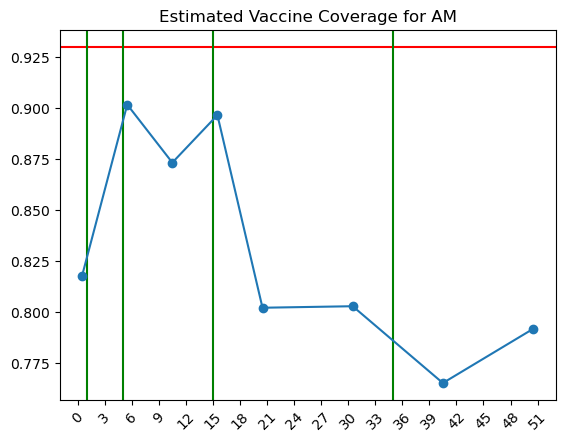

[408397 398684 385927 407298 377753 346674 326283 290296]
[0.18208759 0.09823828 0.12669282 0.10339031 0.19787445 0.19713086
 0.23480084 0.20825336]
484689.35220651486


In [47]:
c = 0
for mun in first_10:
    df_tmp = df_mun[df_mun['SG_UF'] == mun]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] >= 0]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 60]
    mun_name = first_10_names[c]
    min_age = 0
    max_age = 60
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins_grouped = np.array([0,5,10,15,20,30,40,50,60])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=bins_grouped, edgecolor = 'black')
    plt.title('Age and Vaccination Cases (15-35) '+ str(mun_name))
    plt.legend()
    #plt.xlim((15,35))
    #plt.ylim((0,10))
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    #vacs = vacs[1:]
    #nvacs = nvacs[1:]
    #ign = ign[1:]
    vacs = vacs + ign
    p_vacs = vacs/(vacs+nvacs)
    c_vacs = []
    for p in p_vacs:
        if(p == np.nan):
            c_vacs.append(np.nan)
        elif(p == 0):
            c_vacs.append(0)
        else:
            c_vacs.append(coverage_age(p,0.93))
    plt.xticks(np.arange(0,max_age+1,3), rotation = 45)
    plt.axhline(0.93,color = 'r')
    plt.axvline(1, color = 'g')
    plt.axvline(5, color = 'g')
    plt.axvline(15, color = 'g')
    plt.axvline(35, color = 'g')
    plt.title('Estimated Vaccine Coverage for '+ str(mun_name))
    plt.plot(bins[1][0:-1] + 0.5,c_vacs,'-o')
    plt.show()
    c = c + 1
    data_sp = data_muns[data_muns['Unidade da Federacao'] == mun]
    data_sp = data_sp.to_numpy()[0]
    data_sp = data_sp[2:10]
    vec_coverage = 1 - np.array(c_vacs)
    vec_population = data_sp
    vec_nvac_population = vec_coverage*vec_population
    print(data_sp)
    print(vec_coverage)
    total_nvac = np.sum(vec_coverage*vec_population)
    print(total_nvac)

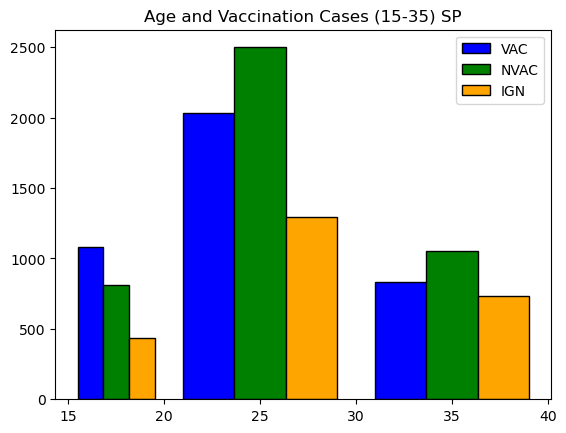

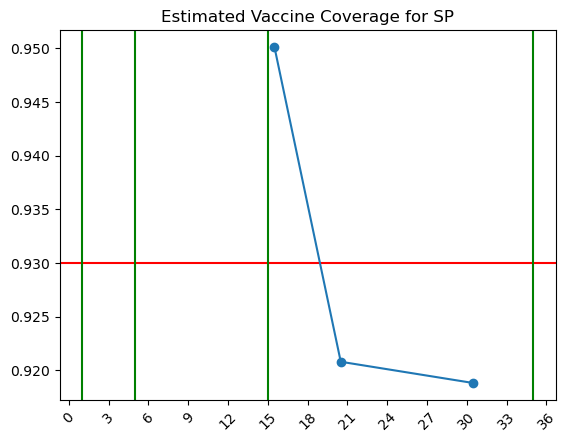

[3429921 3496503 3763557]
[0.04986659 0.07918552 0.08116723]
753388.3662256193


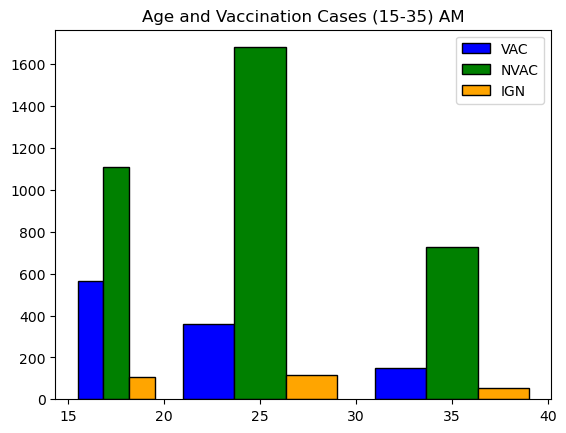

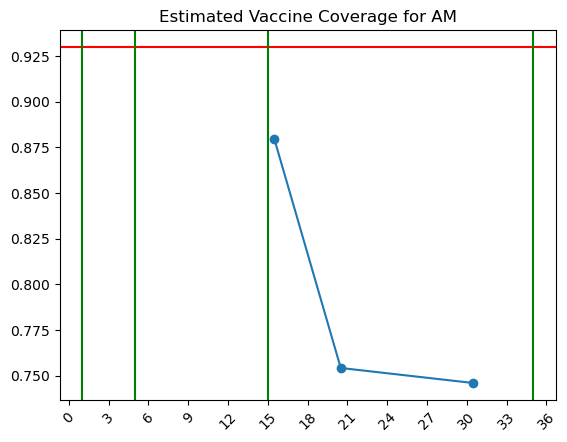

[407298 377753 346674]
[0.12060888 0.24582698 0.25406758]
230064.26059337694


In [48]:
c = 0
for mun in first_10:
    df_tmp = df_mun[df_mun['SG_UF'] == mun]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] >= 15]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 40]
    mun_name = first_10_names[c]
    min_age = 15
    max_age = 40
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins_grouped = np.array([15,20,30,40])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=bins_grouped, edgecolor = 'black')
    plt.title('Age and Vaccination Cases (15-35) '+ str(mun_name))
    plt.legend()
    #plt.xlim((15,35))
    #plt.ylim((0,10))
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    #vacs = vacs[1:]
    #nvacs = nvacs[1:]
    #ign = ign[1:]
    #vacs = vacs + ign
    p_vacs = vacs/(vacs+nvacs)
    c_vacs = []
    for p in p_vacs:
        if(p == np.nan):
            c_vacs.append(np.nan)
        elif(p == 0):
            c_vacs.append(0)
        else:
            c_vacs.append(coverage_age(p,0.93))
    plt.xticks(np.arange(0,max_age+1,3), rotation = 45)
    plt.axhline(0.93,color = 'r')
    plt.axvline(1, color = 'g')
    plt.axvline(5, color = 'g')
    plt.axvline(15, color = 'g')
    plt.axvline(35, color = 'g')
    plt.title('Estimated Vaccine Coverage for '+ str(mun_name))
    plt.plot(bins[1][0:-1] + 0.5,c_vacs,'-o')
    plt.show()
    c = c + 1
    data_sp = data_muns[data_muns['Unidade da Federacao'] == mun]
    data_sp = data_sp.to_numpy()[0]
    data_sp = data_sp[5:8]
    vec_coverage = 1 - np.array(c_vacs)
    vec_population = data_sp
    vec_nvac_population = vec_coverage*vec_population
    print(data_sp)
    print(vec_coverage)
    total_nvac = np.sum(vec_coverage*vec_population)
    print(total_nvac)

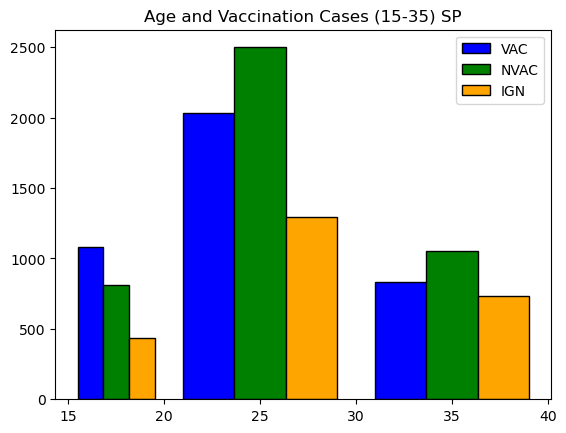

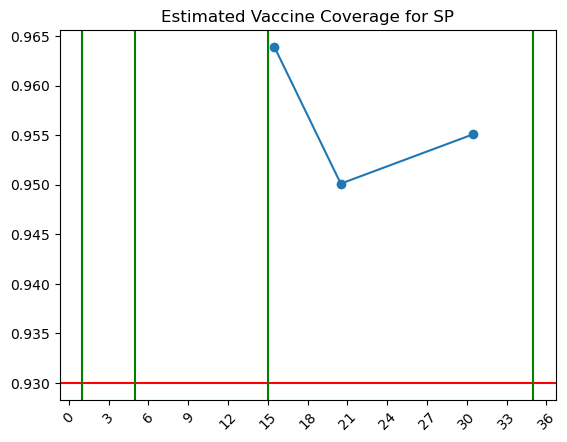

[3429921 3496503 3763557]
[0.03610157 0.04988597 0.04489771]
467227.0761106502


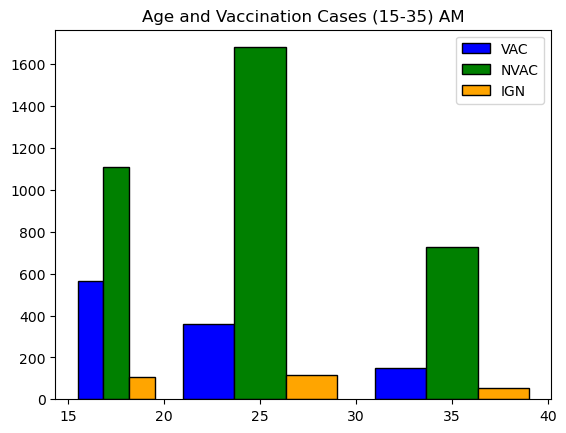

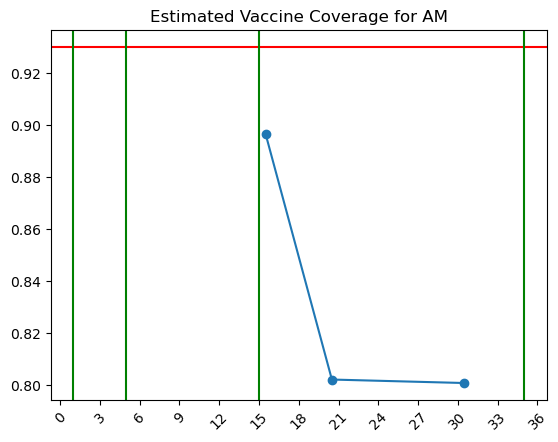

[407298 377753 346674]
[0.10339031 0.19787445 0.19921492]
185920.96423487196


In [49]:
c = 0
for mun in first_10:
    df_tmp = df_mun[df_mun['SG_UF'] == mun]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] >= 15]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 40]
    mun_name = first_10_names[c]
    min_age = 15
    max_age = 40
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins_grouped = np.array([15,20,30,40])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=bins_grouped, edgecolor = 'black')
    plt.title('Age and Vaccination Cases (15-35) '+ str(mun_name))
    plt.legend()
    #plt.xlim((15,35))
    #plt.ylim((0,10))
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    #vacs = vacs[1:]
    #nvacs = nvacs[1:]
    #ign = ign[1:]
    vacs = vacs + ign
    p_vacs = vacs/(vacs+nvacs)
    c_vacs = []
    for p in p_vacs:
        if(p == np.nan):
            c_vacs.append(np.nan)
        elif(p == 0):
            c_vacs.append(0)
        else:
            c_vacs.append(coverage_age(p,0.93))
    plt.xticks(np.arange(0,max_age+1,3), rotation = 45)
    plt.axhline(0.93,color = 'r')
    plt.axvline(1, color = 'g')
    plt.axvline(5, color = 'g')
    plt.axvline(15, color = 'g')
    plt.axvline(35, color = 'g')
    plt.title('Estimated Vaccine Coverage for '+ str(mun_name))
    plt.plot(bins[1][0:-1] + 0.5,c_vacs,'-o')
    plt.show()
    c = c + 1
    data_sp = data_muns[data_muns['Unidade da Federacao'] == mun]
    data_sp = data_sp.to_numpy()[0]
    data_sp = data_sp[5:8]
    vec_coverage = 1 - np.array(c_vacs)
    vec_population = data_sp
    vec_nvac_population = vec_coverage*vec_population
    print(data_sp)
    print(vec_coverage)
    total_nvac = np.sum(vec_coverage*vec_population)
    print(total_nvac)